In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs,0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',

'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})



In [9]:
X

,Intercept,C(occupation)[T.2.0],occ_3,occ_4,occ_5,occ_6,C(occupation_husb)[T.2.0],occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [10]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [11]:
y.shape

(6366, 1)

In [13]:
## checking for any null values

df = pd.concat([X,y],axis=1)
df.isnull().sum()     

Intercept                    0
C(occupation)[T.2.0]         0
occ_3                        0
occ_4                        0
occ_5                        0
occ_6                        0
C(occupation_husb)[T.2.0]    0
occ_husb_3                   0
occ_husb_4                   0
occ_husb_5                   0
occ_husb_6                   0
rate_marriage                0
age                          0
yrs_married                  0
children                     0
religious                    0
educ                         0
affair                       0
dtype: int64

In [14]:
## conclusion - there is no null values

In [15]:
## lets check the data type of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Intercept                  6366 non-null   float64
 1   C(occupation)[T.2.0]       6366 non-null   float64
 2   occ_3                      6366 non-null   float64
 3   occ_4                      6366 non-null   float64
 4   occ_5                      6366 non-null   float64
 5   occ_6                      6366 non-null   float64
 6   C(occupation_husb)[T.2.0]  6366 non-null   float64
 7   occ_husb_3                 6366 non-null   float64
 8   occ_husb_4                 6366 non-null   float64
 9   occ_husb_5                 6366 non-null   float64
 10  occ_husb_6                 6366 non-null   float64
 11  rate_marriage              6366 non-null   float64
 12  age                        6366 non-null   float64
 13  yrs_married                6366 non-null   float

In [16]:
## we see every feature is in float data type

In [24]:
## lets convert affair column in binary numbers

df['affair'] = df['affair'].astype(int)

In [25]:
df['affair'].unique()

array([1, 0])

# Visualization

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


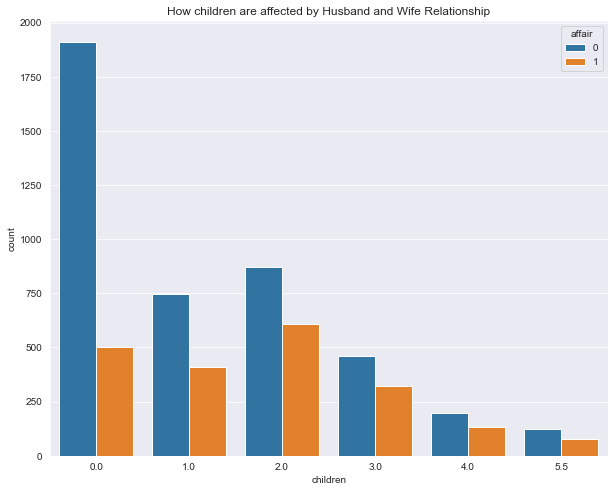

In [27]:
## how children are affected by husband and wife relationship

import seaborn as sns


plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affair")
plt.title("How children are affected by Husband and Wife Relationship")
plt.show()

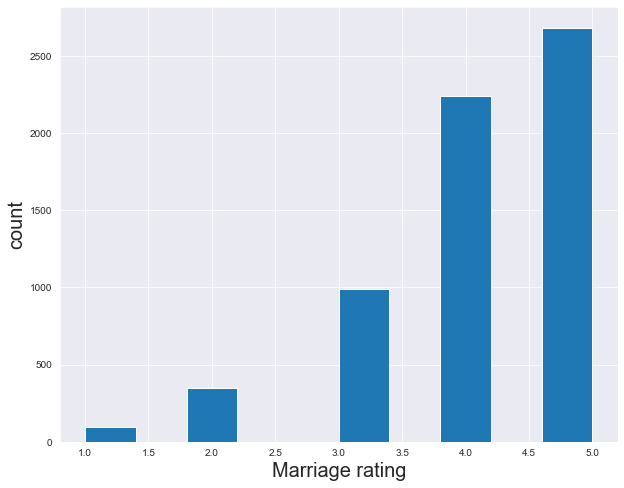

In [28]:
## How women rate their married life on a scale of 1 to 5.

plt.figure(figsize=(10,8))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

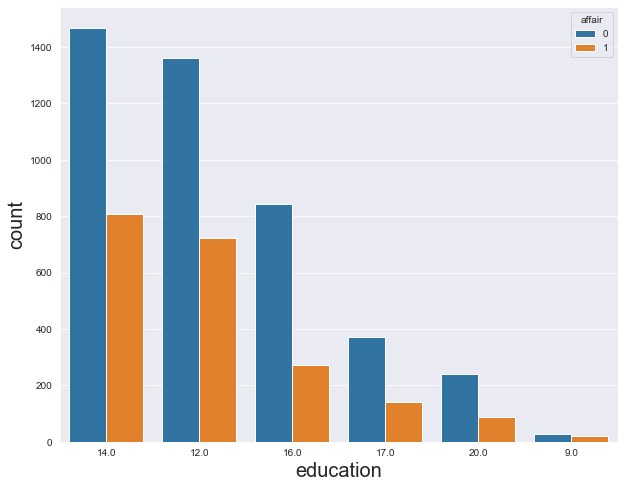

In [30]:
## impact of eduction in marriage

plt.figure(figsize=(10,8))
sns.countplot("educ",hue="affair",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


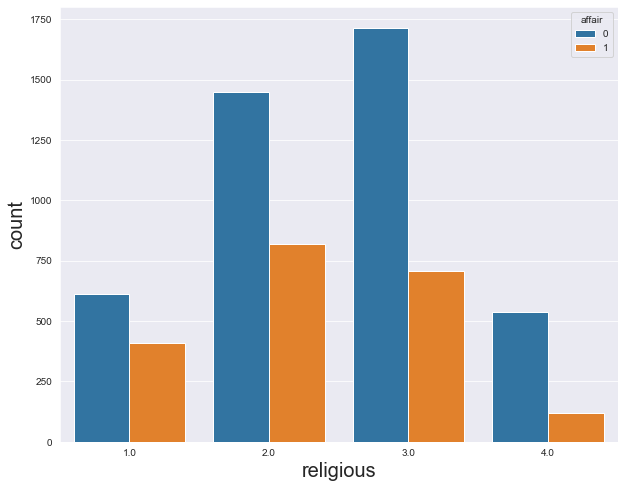

In [31]:
## effect of religion

plt.figure(figsize=(10,8))
sns.countplot("religious",hue="affair",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

# Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5092, 17)
(1274, 17)
(5092, 1)
(1274, 1)


In [34]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
log_predict = classifier.predict(X_test)

In [36]:
log_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report,precision_score,f1_score,recall_score

In [39]:
print("Precision Score:",precision_score(y_test,log_predict))

Precision Score: 0.6525096525096525


In [40]:
print("Accuracy Score:",accuracy_score(y_test,log_predict))

Accuracy Score: 0.728414442700157


In [41]:
print("Recall Score:",recall_score(y_test,log_predict))

Recall Score: 0.3976470588235294


In [42]:
print("F1 Score:",f1_score(y_test,log_predict))

F1 Score: 0.49415204678362573


In [44]:
## confusion matrix

confusion_matrix(y_test,log_predict)

array([[759,  90],
       [256, 169]])

In [ ]:
## conclusion - we got accuracy score as 0.7284